In [80]:
using Plots
using LinearAlgebra
using LaTeXStrings
using Printf
using QuadGK

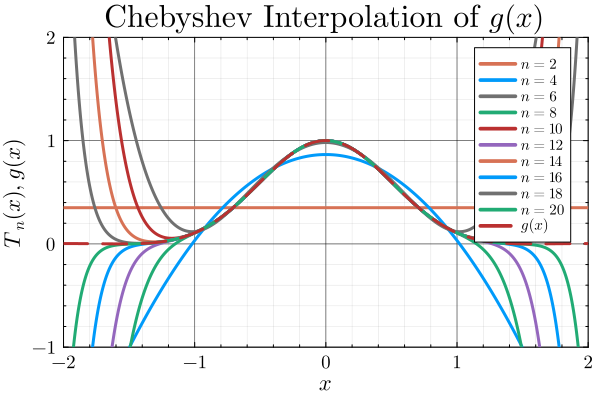

In [81]:
# Chebyshev interpolation function
function chebyshev_interpolation(n, func)
    # Step 1: Generate Chebyshev nodes
    x_nodes = cos.((2 * (1:n) .- 1) * π / (2 * n))
    
    # Step 2: Evaluate the function at the Chebyshev nodes
    y_nodes = func.(x_nodes)
    
    # Step 3: Create the Vandermonde matrix for the Chebyshev polynomial expansion
    T = zeros(n, n)
    for i in 1:n
        T[:, i] = cos.((i-1) * acos.(x_nodes))
    end
    
    # Solve for the coefficients using least squares (since it's interpolation, we expect exact fit)
    coeffs = T \ y_nodes
    
    return x_nodes, y_nodes, coeffs
end

# Function to compute interpolated values for any x
function chebyshev_poly_value(x, coeffs, n)
    T = zeros(n)
    T[1] = 1
    T[2] = x
    for i in 3:n
        T[i] = 2 * x * T[i-1] - T[i-2]
    end
    return sum(coeffs .* T)
end

# Define the range and compute interpolations for various n
x_values = LinRange(-2, 2, 1000)
true_values = g.(x_values)

# Loop over different values of n and plot the results
theme(:dao)
plot()

for n in [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
    x_nodes, y_nodes, coeffs = chebyshev_interpolation(n, g)
    
    # Get interpolated values on a dense grid
    interpolated_values = [chebyshev_poly_value(x, coeffs, n) for x in x_values]
    
    # Plot the interpolation
    plot!(x_values, interpolated_values, label=L"$n= %$n$", linewidth=3)
end

# Plot the true function for comparison
plot!(x_values, true_values, 
    label=L"$g(x)$",
    linewidth=3,
    linestyle=:dash, 
    legend=:best, 
    title=L"Chebyshev Interpolation of $g(x)$", 
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    xlims=(-2,2),
    ylims=(-1,2),
    # yscale=:log10
    )

xlabel!(L"x")
ylabel!(L"T_{n}(x), g(x)")

# savefig("chebs.pdf")

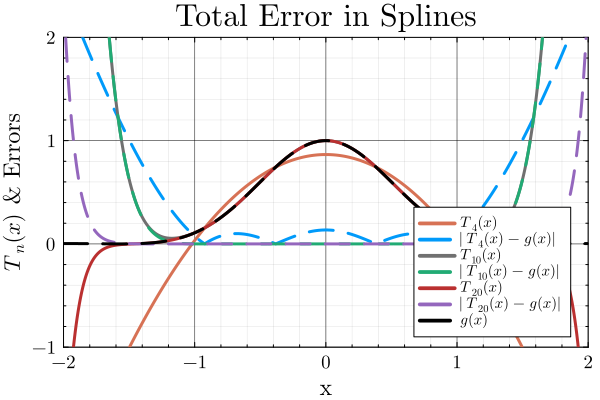

Integral of the error for n = 4: 2.328336305873729
Integral of the error for n = 10: 5.448567141101464
Integral of the error for n = 20: 0.40301619343045925


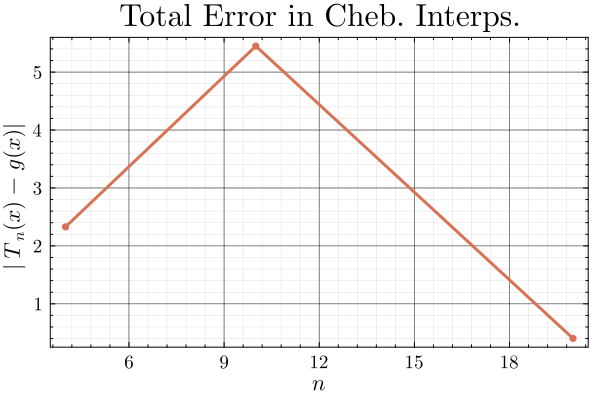

In [82]:
# Define the function g(x)
function g(x)
    return exp(-x^2) * cos(x)^2
end

# Chebyshev interpolation function
function chebyshev_interpolation(n, func)
    # Step 1: Generate Chebyshev nodes
    x_nodes = cos.((2 * (1:n) .- 1) * π / (2 * n))
    
    # Step 2: Evaluate the function at the Chebyshev nodes
    y_nodes = func.(x_nodes)
    
    # Step 3: Create the Vandermonde matrix for the Chebyshev polynomial expansion
    T = zeros(n, n)
    for i in 1:n
        T[:, i] = cos.((i-1) * acos.(x_nodes))
    end
    
    # Solve for the coefficients using least squares (since it's interpolation, we expect exact fit)
    coeffs = T \ y_nodes
    
    return x_nodes, y_nodes, coeffs
end

# Function to compute interpolated values for any x
function chebyshev_poly_value(x, coeffs, n)
    T = zeros(n)
    T[1] = 1
    T[2] = x
    for i in 3:n
        T[i] = 2 * x * T[i-1] - T[i-2]
    end
    return sum(coeffs .* T)
end

# Define the range and compute interpolations for various n
x_values = LinRange(-2, 2, 1000)
true_values = g.(x_values)

# Initialize plot
p = plot()

# Loop over the specific n values
for n in [4, 10, 20]
    x_nodes, y_nodes, coeffs = chebyshev_interpolation(n, g)
    
    # Get interpolated values on a dense grid
    interpolated_values = [chebyshev_poly_value(x, coeffs, n) for x in x_values]
    
    # Plot the Chebyshev polynomial interpolation
    plot!(x_values, interpolated_values, label=L"$T_{%$n}(x)$", linewidth=3)
    
    # Plot the absolute error |T_n(x) - g(x)|
    error_values = abs.(interpolated_values .- true_values)
    plot!(x_values, error_values, label=L"$|T_{%$n}(x) - g(x)|$", linestyle=:dash, linewidth=3)
end

# Plot the true function for comparison
plot!(x_values, true_values, label=L"$g(x)$", linewidth=3, linestyle=:dash, legend=:best, xlims=(-2,2),
ylims=(-1,2), color=:black, title="Total Error in Splines", 
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15
    )

xlabel!("x")
ylabel!(L"$T_{n}(x)$ & Errors")
display(p)
savefig("chebs_and_errors.pdf")

# Define the error function
function error_function(x, coeffs, n, true_function)
    interpolated_value = chebyshev_poly_value(x, coeffs, n)
    return abs(interpolated_value - true_function(x))
end

# Loop over the specific n values and integrate the error function
for n in [4, 10, 20]
    # Get the interpolation coefficients for the current n
    x_nodes, y_nodes, coeffs = chebyshev_interpolation(n, g)
    
    # Use QuadGK to integrate the absolute error |T_n(x) - g(x)|
    integral, error = quadgk(x -> error_function(x, coeffs, n, g), -2, 2)
    
    # Print the result
    println("Integral of the error for n = $n: $integral")
end

# now to plot the total errors (the relative error integrated from -2 to 2)
ns = [4, 10, 20]
ints = [2.328336305873729, 5.448567141101464, 0.40301619343045925]

plot(ns, ints,
    label="",
    legend=:best, 
    line=(3,:solid),
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    markersize=4,
    marker=:circle,
    xlabel=L"$n$",
    ylabel=L"$|T_{n}(x) - g(x)|$",
    title="Total Error in Cheb. Interps."
    )

# savefig("chebs_total_errors.pdf")